#### Import the relevant packages and dataset, initalize the parameters

In [ ]:
# import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os

def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-5, 5])
    axes.set_ylim([-5, 5])
    axes.set_zlim([-5, 5])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()


def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

def visualize_2D_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = plt.gca()
    axes.set_xlim([-5, 5])
    axes.set_ylim([-5, 5])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        plt.scatter(points[idx, 0], points[idx, 1], alpha=0.3, c=colors[i])
        for j in range(8):
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], fill=False, 
                                color=[0.0, 0.0, 1.0, 1.0/(0.5*j+1)]))
        plt.title('GMM')
    plt.xlabel('X')
    plt.ylabel('Y')

    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/2D_GMM_demonstration.png', dpi=100, format='png')

    plt.show()

In [ ]:
# Oringinal Dataset without missing data
np_full = np.array([[0.42,-0.087,0.58],[-0.2,-3.3,-3.4],[1.3,-0.32,1.7],
                    [0.39,0.71,0.23],[-1.6,-5.3,-0.15],           # w1
                 [-0.029,0.89,-4.7],[-0.23,1.9,2.2],[0.27,-0.3,-0.87],
                    [-1.9,0.76,-2.1],[0.87,-1.0,-2.6],
                 [-0.4,0.58,0.089],[-0.31,0.27,-0.04],[0.38,0.055,-0.035],
                    [-0.15,0.53,0.011],[-0.35,0.47,0.034],      # w2
                 [0.17,0.69,0.1],[-0.011,0.55,-0.18],[-0.27,0.61,0.12],
                    [-0.065,0.49,0.0012],[-0.12,0.054,-0.063],
                 [0.83,1.6,-0.014],[1.1,1.6,0.48],[-0.44,-0.41,0.32],
                    [0.047,-0.45,1.4],[0.28,0.35,3.1],               # w3
                 [-0.39,-0.48,0.11],[0.34,-0.079,0.14],[-0.3,-0.22,2.2],
                    [1.1,1.2,-0.46],[0.18,-0.11,-0.49]])

In [ ]:
# Dataset with even x3 show as missing data represent by 0
np_miss = np.array([[0.42,-0.087,0.58],[-0.2,-3.3,0],[1.3,-0.32,1.7],
                    [0.39,0.71,0],[-1.6,-5.3,-0.15],           # w1
                 [-0.029,0.89,0],[-0.23,1.9,2.2],[0.27,-0.3,0],
                    [-1.9,0.76,-2.1],[0.87,-1.0,0],
                 [-0.4,0.58,0.089],[-0.31,0.27,0],[0.38,0.055,-0.035],
                    [-0.15,0.53,0],[-0.35,0.47,0.034],         # w2
                 [0.17,0.69,0],[-0.011,0.55,-0.18],[-0.27,0.61,0],
                    [-0.065,0.49,0.0012],[-0.12,0.054,0],
                 [0.83,1.6,-0.014],[1.1,1.6,0],[-0.44,-0.41,0.32],
                    [0.047,-0.45,0],[0.28,0.35,3.1],               # w3
                 [-0.39,-0.48,0],[0.34,-0.079,0.14],[-0.3,-0.22,0]
                    ,[1.1,1.2,-0.46],[0.18,-0.11,0]]) 

In [ ]:
# initial the mean and the covariance matrix
init_mean_matrix = np.array([[0.0, 0.0, 0.0],
                            [0.0, 0.0, 0.0],
                            [0.0, 0.0, 0.0]])

init_convariance_matrix = np.array([
                     np.diag([1.00, 1.00, 1.00]),
                     np.diag([1.00, 1.00, 1.00]),
                     np.diag([1.00, 1.00, 1.00])])

In [ ]:
np.diag([1.00, 1.00, 1.00])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

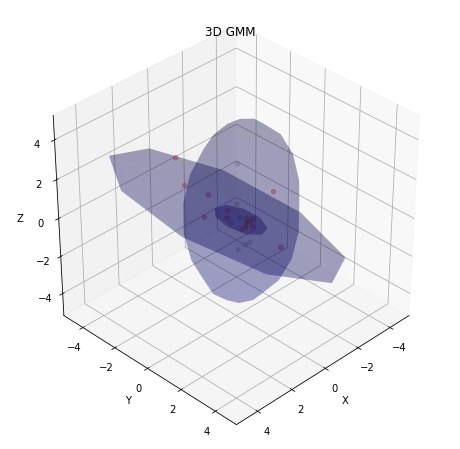

In [ ]:
# GMMM EM with missing dataset i think this code is wrong:
from numpy.linalg import inv
#fit the gaussian model
# we have 30 mixture points, inital our own mean matrix, 
gmm = GaussianMixture(n_components=3, means_init=init_mean_matrix,
                      covariance_type='diag')
# EM algorithm fit(), return the fitted model
gmm.fit(np_miss)
# visualize
visualize_3d_gmm(np_miss, gmm.weights_, gmm.means_.T, 
                 np.sqrt(gmm.covariances_).T)

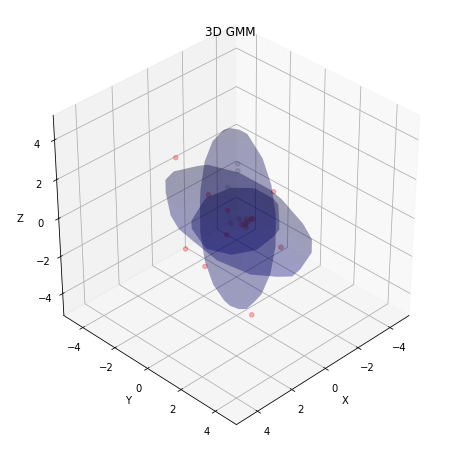

In [ ]:
# GMM EM with complete dataset
#fit the gaussian model
gmm = GaussianMixture(n_components=3, means_init=init_mean_matrix,
                      covariance_type='tied')
# EM algorithm fit(), return the fitted model
gmm.fit(np_full)
# visualize
visualize_3d_gmm(np_full, gmm.weights_, gmm.means_.T, 
                 np.sqrt(gmm.covariances_).T)

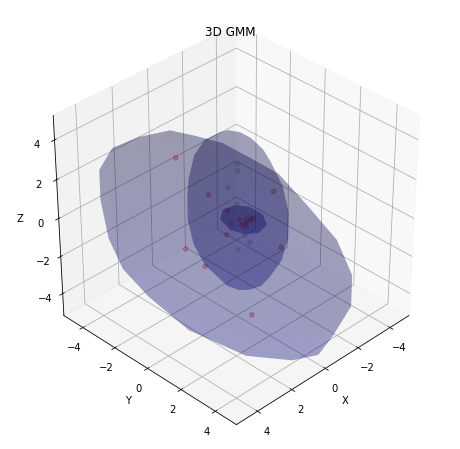

In [ ]:
# GMM EM with complete dataset
#fit the gaussian model
gmm = GaussianMixture(n_components=3, means_init=init_mean_matrix,
                      covariance_type='diag')
# EM algorithm fit(), return the fitted model
gmm.fit(np_full)
# visualize
visualize_3d_gmm(np_full, gmm.weights_, gmm.means_.T,
                 np.sqrt(gmm.covariances_).T)

the last one is better than others because it ploted with complete dataset and 'diag' covariance_type

###  AIC & BIC 
### a)
• Akaike Information Criterion (AIC). Derived from frequentist probability.
• Bayesian Information Criterion (BIC). Derived from Bayesian probability.

Akaike and Bayesian Information Criterion are two ways of scoring a model based on its log-likelihood and complexity.

The AIC statistic is defined for logistic regression as follows (taken from “The Elements of Statistical Learning“):
AIC = -2/N * LL + 2 * k/N
Where N is the number of examples in the training dataset, LL is the log-likelihood of the model on the training dataset, and k is the number of parameters in the model.
The score, as defined above, is minimized, e.g. the model with the lowest AIC is selected.
Compared to the BIC method (below), the AIC statistic penalizes complex models less, meaning that it may put more emphasis on model performance on the training dataset, and, in turn, select more complex models.


The BIC statistic is calculated for logistic regression as follows (taken from “The Elements of Statistical Learning“):
• BIC = -2 * LL + log(N) * k
Where log() has the base-e called the natural logarithm, LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.
The score as defined above is minimized, e.g. the model with the lowest BIC is selected.
The quantity calculated is different from AIC, although can be shown to be proportional to the AIC. Unlike the AIC, the BIC penalizes the model more for its complexity, meaning that more complex models will have a worse (larger) score and will, in turn, be less likely to be selected.


Though these two measures are derived from a different perspective, they are closely related. Apparently, the only difference is BIC considers the number of observations in the formula, which AIC does not. Though BIC is always higher than AIC, lower the value of these two measures, better the model.




### b & c)

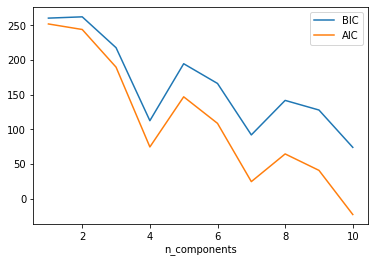

In [ ]:
# plot BIC AIC with missing dataset
n_components = np.arange(1, 11)
clfs = [GaussianMixture(n,max_iter = 1000,covariance_type='diag').fit(np_miss)
        for n in n_components]
bics = [clf.bic(np_miss) for clf in clfs]
aics = [clf.aic(np_miss) for clf in clfs]
    
plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

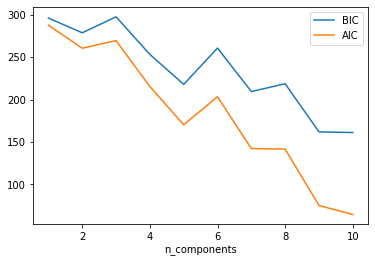

In [ ]:
# plot BIC AIC with complete dataset
n_components = np.arange(1, 11)
clfs = [GaussianMixture(n,max_iter = 1000,covariance_type='diag').fit(np_full)
        for n in n_components]
bics = [clf.bic(np_full) for clf in clfs]
aics = [clf.aic(np_full) for clf in clfs]covariance_type=
    
plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

# d)the min of BIC and AIC is 10 so we can do EM algorithm again with n_components=10 

In [ ]:
#means_initarray-like of shape (n_components, n_features),

In [ ]:
init_mean_matrix = np.array([[0.0, 0.0, 0.0],
                            [0.0, 0.0, 0.0],
                            [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0],
                             [0.0, 0.0, 0.0]])



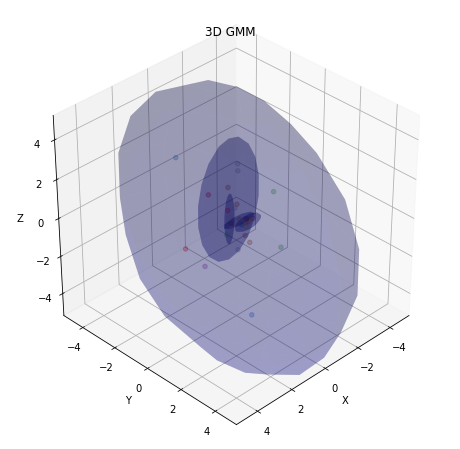

In [ ]:
# GMM EM with complete dataset and n_components=10
#fit the gaussian model
gmm = GaussianMixture(n_components=10, means_init=init_mean_matrix, 
                      covariance_type='diag')
# EM algorithm fit(), return the fitted model
gmm.fit(np_full)
# visualize
visualize_3d_gmm(np_full, gmm.weights_, gmm.means_.T, 
                 np.sqrt(gmm.covariances_).T)



### *If we use our random dataset, the codes will be like this:

In [ ]:
import numpy as np
from sklearn.utils import shuffle
# generation of 100 3D points according to the centered normal law
# each group is translated by a vector [3,3,3]
# |= np.random.randn : Return a random sample (or samples) from the "standard normal" distribution.
d1 = np.random.randn(100,3) + [3,3,3]
d2 = np.random.randn(100,3) + [-3,-3,-3]
d3 = np.random.randn(100,3) + [-3,3,3]
d4 = np.random.randn(100,3) + [-3,-3,3]
d5 = np.random.randn(100,3) + [3,3,-3]

# concatenation of data in a matrix
# |= np.concatenate: Join a sequence of arrays along an existing axis.
data = np.concatenate((d1,d2,d3,d4,d5))



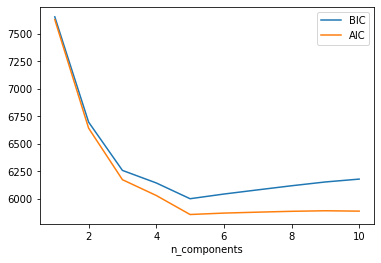

In [ ]:
# plot BIC AIC with missing dataset
n_components = np.arange(1, 11)
clfs =[GaussianMixture(n,max_iter = 1000,covariance_type='diag').fit(data)
        for n in n_components]
bics = [clf.bic(data) for clf in clfs]
aics = [clf.aic(data) for clf in clfs]
    
plt.plot(n_components, bics, label = 'BIC')
plt.plot(n_components, aics, label = 'AIC')
plt.xlabel('n_components')
plt.legend()
plt.show()

# with our random dataset minimum n_components is 5 so:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

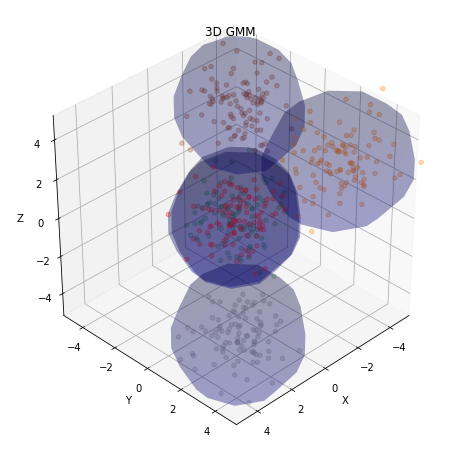

In [ ]:
# GMM EM with complete dataset n_components=5
#fit the gaussian model
gmm = GaussianMixture(n_components=5, covariance_type='diag')
# EM algorithm fit(), return the fitted model
gmm.fit(data)
# visualize
visualize_3d_gmm(data, gmm.weights_, gmm.means_.T, 
                 np.sqrt(gmm.covariances_).T)

# the above plot is really better than the plot wich was draw by the given data in the table, because our random dataset is really bigger. so the result is better.